<a href="https://colab.research.google.com/github/MorshedulHoque/College-Placement/blob/main/College_Placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/College Placement/placement.csv")

# **Data Preprocessing**

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [7]:
df.columns

Index(['Unnamed: 0', 'cgpa', 'iq', 'placement'], dtype='object')

In [10]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# **EDA**

In [13]:
import matplotlib.pyplot as plt

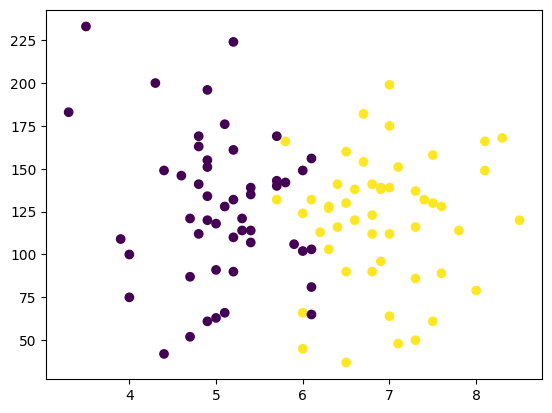

In [16]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [23]:
X = df[['cgpa','iq']]
Y = df['placement']

In [24]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


# **Test Train Split**

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [26]:
X_train

,cgpa,iq
46,5.3,114.0
41,5.4,114.0
22,4.9,120.0
94,4.7,52.0
33,6.0,149.0
...,...,...
50,3.5,233.0
51,4.8,141.0
65,8.1,166.0
93,6.8,112.0


# **Scale the values**

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)

In [30]:
X_train

array([[-0.54451179, -0.26209074],
       [-0.45668731, -0.26209074],
       [-0.89580972, -0.11389283],
       [-1.07145869, -1.79346909],
       [ 0.07025959,  0.60239704],
       [ 0.509382  ,  0.13310367],
       [-1.68623007, -1.22537712],
       [-0.45668731, -0.4349883 ],
       [ 1.38762683,  0.8246939 ],
       [ 0.15808407, -1.47237363],
       [ 1.65110027, -0.26209074],
       [ 0.86067993,  0.33070088],
       [-1.42275662,  1.86207923],
       [-0.89580972,  0.75059495],
       [ 1.47545131, -0.87958201],
       [-0.89580972,  0.23190228],
       [ 0.509382  , -0.85488236],
       [-0.63233628,  0.89879285],
       [-1.77405455, -0.38558899],
       [ 0.15808407,  0.18250298],
       [ 0.86067993,  0.35540053],
       [-0.63233628,  0.18250298],
       [ 0.94850441, -0.31149004],
       [ 1.82674924, -1.12657852],
       [-0.19321386,  0.18250298],
       [ 0.77285545, -0.85488236],
       [ 0.15808407,  0.7752946 ],
       [-0.10538938,  1.02229111],
       [ 1.38762683,

In [32]:
X_test = scaler.transform(X_test)

# **Model Train**

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
from sklearn.metrics import accuracy_score

result = model.predict(X_test)

In [41]:
accuracy_score(y_test, result)

0.8

**Plot Decision Regions**

<Axes: >

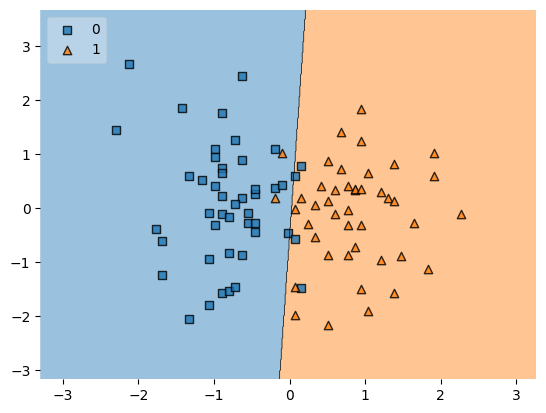

In [43]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train.values, clf=model, legend=2)

In [44]:
import pickle

pickle.dump(model, open("model.pkl","wb"))